In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
describe = data.describe()
describe

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

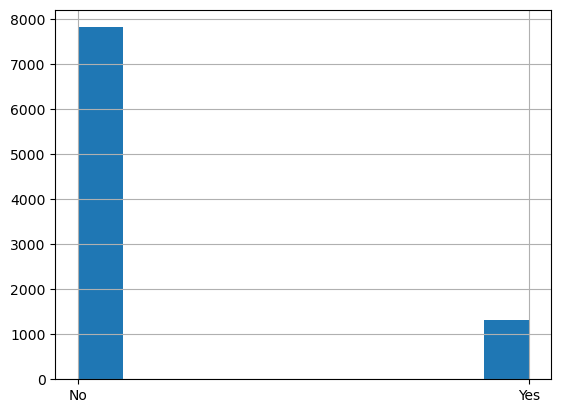

In [5]:
data["Response"].hist() 

In [6]:
IC = data[["Response","Sales Channel"]]
IC

,Response,Sales Channel
0,No,Agent
1,No,Agent
2,No,Agent
3,No,Call Center
4,No,Agent
...,...,...
9129,No,Web
9130,Yes,Branch
9131,No,Branch
9132,No,Branch


In [7]:
IC = IC[IC["Response"] == "Yes"]
IC = IC.reset_index(drop=True)
IC

,Response,Sales Channel
0,Yes,Web
1,Yes,Agent
2,Yes,Agent
3,Yes,Branch
4,Yes,Agent
...,...,...
1303,Yes,Agent
1304,Yes,Branch
1305,Yes,Branch
1306,Yes,Agent


In [8]:
count = IC["Sales Channel"].value_counts()
count

Agent          666
Branch         294
Call Center    192
Web            156
Name: Sales Channel, dtype: int64

<AxesSubplot:>

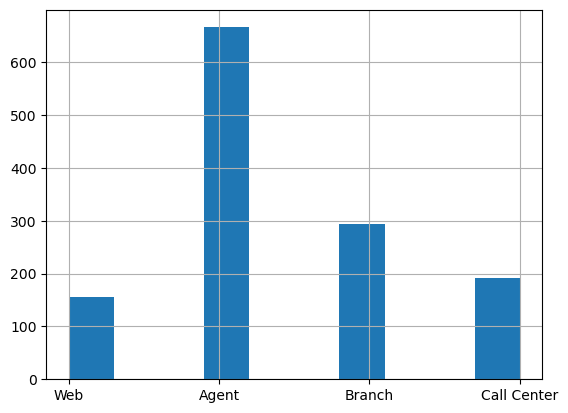

In [9]:
IC["Sales Channel"].hist() 

In [22]:
IC2 = data[["Response","Total Claim Amount"]]
IC2

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


In [23]:
ICNO = IC2[IC2["Response"] == "No"]
ICNO = ICNO.reset_index(drop=True)
ICNO

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
7821,No,541.282007
7822,No,198.234764
7823,No,790.784983
7824,No,691.200000


In [24]:
describe = ICNO.describe()
describe

,Total Claim Amount
count,7826.000000
mean,432.084497
std,297.815881
min,0.099007
25%,253.236318
50%,377.083630
75%,550.092193
max,2893.239678


<AxesSubplot:>

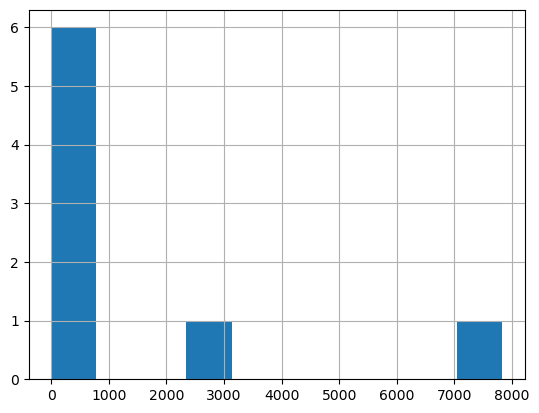

In [25]:
describe["Total Claim Amount"].hist()

In [26]:
IC2 = IC2[IC2["Response"] == "Yes"]
IC2 = IC2.reset_index(drop=True)
IC2

,Response,Total Claim Amount
0,Yes,159.383042
1,Yes,321.600000
2,Yes,511.200000
3,Yes,528.000000
4,Yes,511.200000
...,...,...
1303,Yes,523.200000
1304,Yes,326.400000
1305,Yes,465.600000
1306,Yes,364.800000


In [27]:
describe2 = IC2.describe()
describe2

,Total Claim Amount
count,1308.000000
mean,446.080868
std,241.906812
min,7.345946
25%,316.800000
50%,410.120119
75%,547.200000
max,1358.400000


<AxesSubplot:>

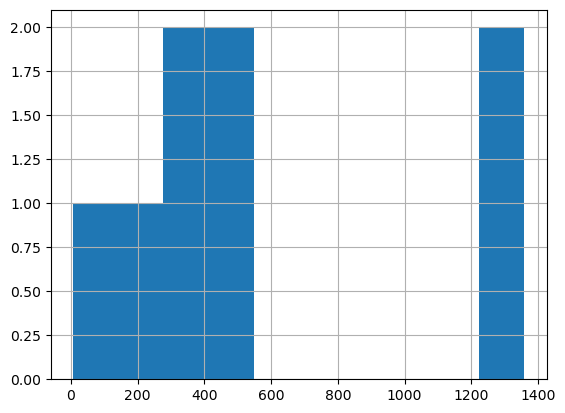

In [28]:
describe2["Total Claim Amount"].hist()

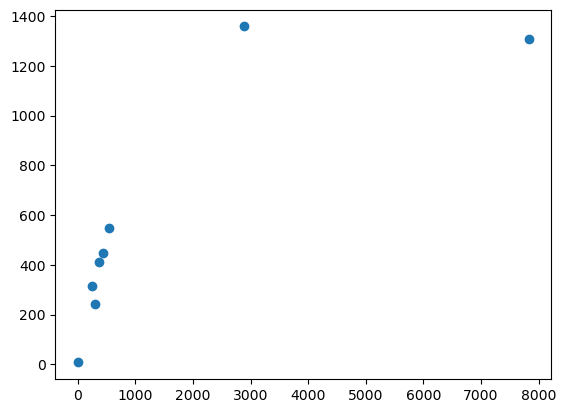

In [38]:
plt.scatter(x=describe["Total Claim Amount"],y=describe2["Total Claim Amount"])

In [69]:
IC3 = data[["Response","Income"]]
IC3

,Response,Income
0,No,56274
1,No,0
2,No,48767
3,No,0
4,No,43836
...,...,...
9129,No,71941
9130,Yes,21604
9131,No,0
9132,No,21941


In [67]:
IC3 = IC3[IC3["Response"] == "Yes"]
IC3 = IC3.reset_index(drop=True)
IC3

,Response,Income
0,Yes,62902
1,Yes,55350
2,Yes,14072
3,Yes,99845
4,Yes,14072
...,...,...
1303,Yes,20090
1304,Yes,56005
1305,Yes,13663
1306,Yes,0


In [59]:
describe = IC3.describe()
describe

,Income
count,1308.000000
mean,38544.027523
std,28043.637944
min,0.000000
25%,18495.000000
50%,32234.000000
75%,60880.000000
max,99845.000000


<AxesSubplot:>

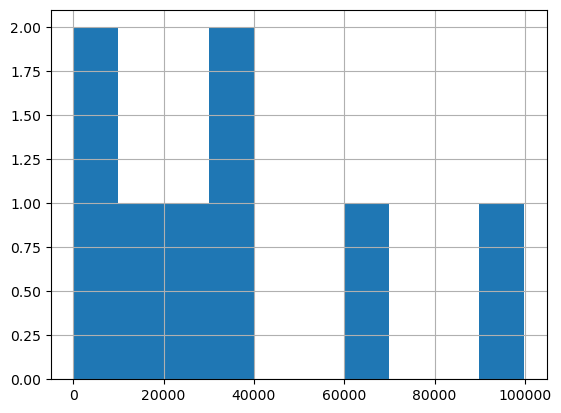

In [60]:
describe["Income"].hist()

In [71]:
IC3 = IC3[IC3["Response"] == "No"]
IC3 = IC3.reset_index(drop=True)
IC3

,Response,Income
0,No,56274
1,No,0
2,No,48767
3,No,0
4,No,43836
...,...,...
7821,No,47761
7822,No,71941
7823,No,0
7824,No,21941


In [72]:
describe2 = IC3.describe()
describe2

,Income
count,7826.000000
mean,37509.190008
std,30752.259099
min,0.000000
25%,0.000000
50%,34091.000000
75%,62454.250000
max,99981.000000


<AxesSubplot:>

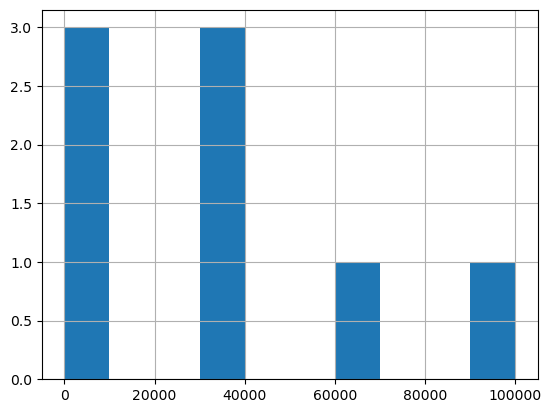

In [74]:
describe2["Income"].hist()